In [1]:
import numpy as np
import matplotlib.pyplot as plt

from modified_gillespie import run

In [2]:
class ReactionParameters:
    geneR_init = int(1)
    geneA_init = int(1)
    V = 4.189

    k1 = 50
    k2a = 602 / V
    k2b = 50
    k3 = 500
    k4 = 0.01
    k5a = 602 / V
    k5b = 100
    k6 = 50
    k7 = 50
    k8 = 5
    k9 = 1204 / V
    k10 = 1
    k11 = 1
    k12 = 0.2
    k13 = 10
    k14 = 0.5

In [3]:
pm = ReactionParameters()
states, times =  run(max_time=100, pm=pm)
states = np.array(states)

[]

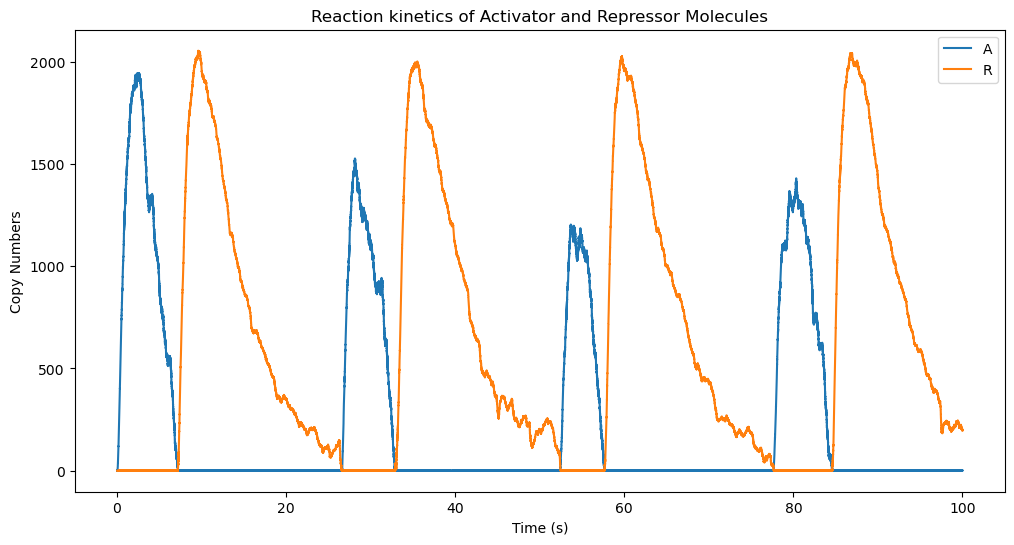

In [9]:
# order -  geneA, mRNA_A, A, geneA_bound, geneR, mRNA_R, geneR_bound, R, C
A = states[:, 2]
R = states[:, 7]

plt.figure(figsize=[12,6])
plt.plot(times, A, label="A")
plt.plot(times, R, label="R")
plt.title("Reaction kinetics of Activator and Repressor Molecules")
plt.xlabel("Time (s)")
plt.ylabel("Copy Numbers")
plt.legend()
plt.savefig("../../data/vilar_kinetics.png")
plt.plot()

A peaks first, which makes sense given the rates in the previous question

In [12]:
y = states[:, 2].copy()
y = np.sort(y) 
y = y[::-1] 
y = np.average(y[0:4])
print('The average values of the A peaks:', y)

The average values of the peaks: 1944.5


In [13]:
y = states[:, 7].copy()
y = np.sort(y) 
y = y[::-1] 
y = np.average(y[0:4])
print('The average values of the R peaks:', y)

The average values of the R peaks: 2053.25


In [14]:
class ReactionParametersModified:
    geneR_init = int(1)
    geneA_init = int(1)
    V = 4.189

    k1 = 50
    k2a = 602 / V
    k2b = 50
    k3 = 500
    k4 = 0.01
    k5a = 602 / V
    k5b = 100
    k6 = 50
    k7 = 50
    k8 = 5
    k9 = 1204 / V
    k10 = 1
    k11 = 1
    k12 = 0.05
    k13 = 10
    k14 = 0.5

[]

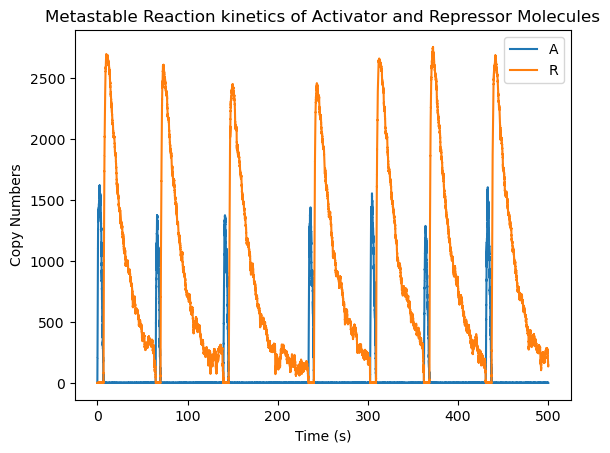

In [16]:
pm = ReactionParametersModified()
states, times =  run(max_time=500, pm=pm)
states = np.array(states)

A = states[:, 2]
R = states[:, 7]

plt.figure()
plt.plot(times, A, label="A")
plt.plot(times, R, label="R")
plt.title("Metastable Reaction kinetics of Activator and Repressor Molecules")
plt.xlabel("Time (s)")
plt.ylabel("Copy Numbers")
plt.legend()
plt.savefig("../../data/vilar_kinetics_unstable.png")
plt.plot()